In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [16]:
x,y=make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=20)

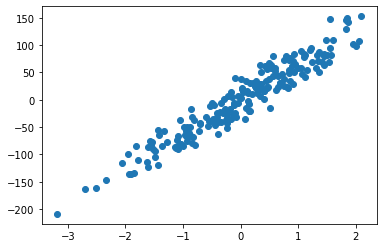

In [17]:
plt.scatter(x,y)

In [10]:
x.shape

(200, 5)

In [11]:
y.shape

(200,)

In [8]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model1=LinearRegression()

In [23]:
model1.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=model1.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9021328585299082

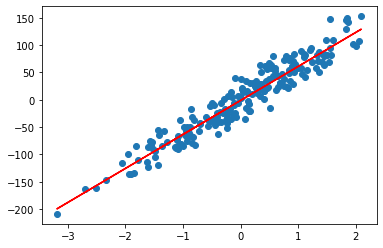

In [26]:
plt.scatter(x,y)
plt.plot(x_train,model1.predict(x_train),color='red')

In [48]:
class GDRegressor:
    def __init__(self,learning_rate,epoches):
        self.m=100
        self.b=-120
        self.lr_rate=learning_rate
        self.epoches=epoches
        
    def fit(self,x,y):
        for i in range(self.epoches):
            loss_slope_b=-2*np.sum(y-(self.m*x.ravel()+self.b))
            loss_slope_m=-2*np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
            self.b=self.b-(self.lr_rate*loss_slope_b)
            self.m=self.m-(self.lr_rate*loss_slope_m)
        print(self.m,self.b)
    def predict(self,x):
        return self.m*x+self.b

In [84]:
gd=GDRegressor(0.001,50)

In [85]:
model1.coef_

array([62.25196587])

In [86]:
model1.intercept_

-1.0918887560190087

In [87]:
gd.fit(x_train,y_train)

62.25196454203347 -1.0918974652222717


In [88]:
y_pred=gd.predict(x_test)

In [89]:
r2_score(y_test,y_pred)

0.9021328364667384

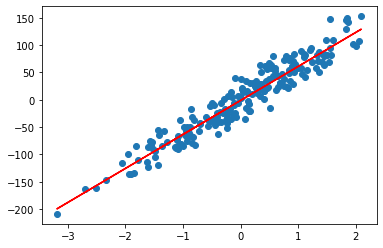

In [90]:
plt.scatter(x,y)
plt.plot(x_train,gd.predict(x_train),color='red')

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
forest=RandomForestRegressor(n_estimators=500,n_jobs=-1,random_state=42)

In [113]:
forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [114]:
y_pred=forest.predict(x_test)

In [115]:
r2_score(x_test,y_pred)

-3885.6134444001405

In [5]:
from sklearn.datasets import load_diabetes

In [6]:
x,y=load_diabetes(return_X_y=True)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [120]:
mul_reg=LinearRegression()
mul_reg.fit(x_train,y_train)

LinearRegression()

In [122]:
mul_reg.coef_

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

In [123]:
mul_reg.intercept_

151.00821291456543

In [141]:
r2_score(y_test,mul_reg.predict(x_test))

0.4772897164322617

In [150]:
class GDRegressor:
    def __init__(self,learning_rate=0.01,epoches=100):
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epoches
    def fit(self,x_train,y_train):
        self.intercept_=0
        self.coef_=np.ones(x_train.shape[1])
        for i in range(self.epochs):
            y_hat=np.dot(x_train,self.coef_) + self.intercept_
            intercept_der=-2*np.mean(y_train-y_hat)
            self.intercept_=self.intercept_ - (self.lr*intercept_der)
            coef_der=-2*np.dot((y_train-y_hat),x_train)/x_train.shape[0]
            self.coef_=self.coef_-(self.lr*coef_der)
        print(self.intercept_,self.coef_)
    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_

In [175]:
gdr=GDRegressor(learning_rate=0.8,epoches=400)

In [176]:
gdr.fit(x_train,y_train)

150.98619970251042 [  49.92885697 -165.97391071  466.76404383  316.15993169  -53.77980553
  -79.87814421 -223.64691811  153.21061638  304.42106113  131.04014429]


In [177]:
r2_score(y_test,gdr.predict(x_test))

0.47878769929092213

In [1]:
#stocastic gradient descent

In [19]:
class SGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,x_train,y_train):
        self.intercept_=120
        self.coef_=np.ones(x_train.shape[1])
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx=np.random.randint(0,x_train.shape[0])
                
                y_hat=np.dot(x_train[idx],self.coef_)+self.intercept_
                intercept_der=-2*np.sum(y_train[idx]-y_hat)
                self.intercept_=self.intercept_ - (self.lr*intercept_der)
                
                coef_der=-2*np.dot((y_train[idx]-y_hat),x_train[idx])
                self.coef_=self.coef_ - (self.lr*coef_der)
        print(self.intercept_,self.coef_)
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_
                
            

In [36]:
sgd=SGDRegressor(learning_rate=0.01,epochs=100)

In [37]:
sgd.fit(x_train,y_train)

146.62845865719493 [  47.73711554 -173.35194331  463.54310156  311.46060085  -46.29820532
  -69.60076776 -225.58687324  158.20861645  298.32993828  132.96578014]


In [38]:
y_predict=sgd.predict(x_test)

In [39]:
r2_score(y_test,y_predict)

0.4692211632859987

In [40]:
from sklearn.linear_model import SGDRegressor

In [61]:
model2=SGDRegressor(alpha=0.001,max_iter=10000)

In [62]:
model2.fit(x_train,y_train)

SGDRegressor(alpha=0.001, max_iter=10000)

In [63]:
y_pred=model2.predict(x_test)

In [64]:
r2_score(y_test,y_pred)

0.46951171107426315

In [74]:
import random

In [81]:
class MBGDregressor:
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        self.coef_=None
        self.epochs=epochs
        self.intercept_=None
        self.lr=learning_rate
        self.batch_size=batch_size
    def fit(self,x_train,y_train):
        self.intercept_=0
        self.coef_=np.ones(x_train.shape[1])
        for i in range(self.epochs):
            for j in range(int(x_train.shape[0]/self.batch_size)):
                idx=random.sample(range(x_train.shape[0]),self.batch_size)
                y_hat=np.dot(x_train[idx],self.coef_)+self.intercept_
                intercept_der=-2*np.mean(y_train[idx]-y_hat)
                self.intercept_=self.intercept_ - (self.lr*intercept_der)
                coef_der=-2*np.dot((y_train[idx]-y_hat),x_train[idx])
                self.coef_=self.coef_ - (self.lr*coef_der)
        print(self.intercept_,self.coef_)
    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_

In [82]:
mbr=MBGDregressor(batch_size=int(x_train.shape[0]/50),learning_rate=0.01,epochs=40)

In [83]:
mbr.fit(x_train,y_train)

147.63914229272896 [  66.32550895  -54.75506591  314.55151308  226.46433353   17.3876393
   -2.29667002 -170.66776546  149.51454639  231.56783769  143.12019053]


In [84]:
r2_score(y_test,mbr.predict(x_test))

0.44042034393086926